<a href="https://colab.research.google.com/github/pminhtu24/Game-Fropig/blob/main/vietocr_gettingstart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Introduction
<p align="center">
<img src="https://raw.githubusercontent.com/pbcquoc/vietocr/master/image/vietocr.jpg" width="512" height="512">
</p>
This notebook describe how you can use VietOcr to train OCR model




In [1]:
! pip install --quiet vietocr

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.9/133.9 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 89.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.8/297.8 kB 23.3 MB/s eta 0:00:00


# Inference

In [2]:
import matplotlib.pyplot as plt
from PIL import Image

from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg

In [1]:
!pip install Pillow==9.5.0  # Adjust version as needed


In [3]:
config = Cfg.load_config_from_name('vgg_transformer')

Change weights to your weights or using default weights from our pretrained model. Path can be url or local file

In [4]:
# config['weights'] = './weights/transformerocr.pth'
config['cnn']['pretrained']=False
config['device'] = 'cuda:0'

In [5]:
detector = Predictor(config)

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
18533it [00:00, 28004.99it/s]
/usr/local/lib/python3.11/dist-packages/vietocr/tool/predictor.py:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user

In [6]:
! wget https://vocr.vn/data/vietocr/sample.zip
! unzip  -qq -o sample.zip

--2025-02-14 06:50:32--  https://vocr.vn/data/vietocr/sample.zip
Resolving vocr.vn (vocr.vn)... 128.199.222.116
Connecting to vocr.vn (vocr.vn)|128.199.222.116|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 305969 (299K) [application/zip]
Saving to: ‘sample.zip’

sample.zip          100%[===================>] 298.80K  --.-KB/s    in 0.005s  

2025-02-14 06:50:32 (60.6 MB/s) - ‘sample.zip’ saved [305969/305969]



In [7]:
! ls sample | shuf |head -n 5

038071004740.jpeg
4448.jpg
deskewed-2019_08_28_tran_thi_thanh_2019082813444611_9.jpg
58788.jpg
036183007715.jpeg


'001085019081'

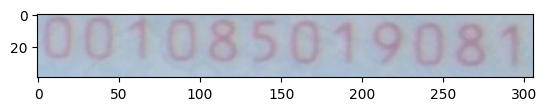

In [13]:
img = './sample/001085019081.jpeg'
img = Image.open(img)
plt.imshow(img)
s = detector.predict(img)
s

Processed z698586632212_6429085b4765fefe8c63dafe23568179_588_125_842_383_0.jpg: 26/05/2018
Processed 1639712135515_375_1189_2274_3323_2.jpg: 51H-038.46
Processed 20160831_082937_71_80_359_377_0.jpg: Có hiệu lực đến hết ngày
Processed 1620090597778_740_1267_2534_2561_3.jpg: 4848055
Processed 20170410_075541_613_240_1366_995_1.jpg: Có hiệu lực đến hết ngày
Processed 20170329_104654_625_349_1266_1011_2.jpg: Có hiệu lực đến hết ngày
Processed 20180911_173710_1145_219_1695_799_0.jpg: PHOTEN
Processed 20170109_080811_431_205_1221_1060_0.jpg: 51F:195.77
Processed 1620090597778_740_1267_2534_2561_2.jpg: 51B-289.81
Processed IMG_2466_772_1010_2331_2509_4.jpg: 51G-907.55
Processed 20170605_100210_1116_370_1672_845_0.jpg: BERTAIN
Processed 20171003_094846_276_201_1164_968_0.jpg: 06/18
Processed IMG_5035_181_173_419_391_2.jpg: 1188066
Processed 20160726_115418_423_110_645_349_4.jpg: SAISING
Processed IMG_8117_355_234_553_379_3.jpg: 2/20
Processed 20170403_082107_511_224_1220_964_2.jpg: 04/19
Proce

/usr/local/lib/python3.11/dist-packages/vietocr/tool/translate.py:115: RuntimeWarning: invalid value encountered in divide
  char_probs = np.sum(char_probs, axis=-1)/(char_probs>0).sum(-1)


Processed 20170907_104851_448_241_1111_913_4.jpg: OUTLY
Processed 1617326797118_486_1721_2229_3808_0.jpg: 8310971
Processed 20170619_082656_539_227_1276_839_2.jpg: 06/12/2017
Processed IMG_5035_181_173_419_391_4.jpg: Có hiệu lực đến hét ngày
Processed TEM DK_343_55_529_241_1.jpg: Thời hoa trong triv vào theo
Processed 1617326797118_2088_2783_2952_3996_2.jpg: 03100000000
Processed z1111874733326_887e06630f5c192e500d494aed5c59e8_712_132_1060_502_0.jpg: Thời hạn nộp phí kỳ tiếp theo
Processed 20170601_083800_527_201_1231_870_4.jpg: 2016908
Processed IMG_0832_2360_857_3493_2147_2.jpg: 61A-497.00
Processed 20171019_094540_490_195_1261_921_3.jpg: 51G494.62
Processed 1608693294526_2393_1246_3636_2211_2.jpg: Thời hạn nộp phùng các veo
Processed 20170109_080811_1205_218_1771_868_0.jpg: WIN
Processed 20170731_101358_497_115_675_310_4.jpg: 01/19
Processed 20170628_114734_531_279_1205_893_2.jpg: 05/01/2019
Processed 20171009_080657_1271_323_1644_903_3.jpg: 11/17
Processed 1621826597406_296_1363_22

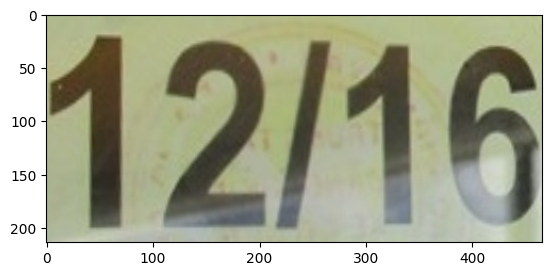

In [18]:
import os
image_folder = "/content/temdangkiemv2"
output_file = "labels.txt"
def process_images_in_folder(folder_path, output_file):
    with open(output_file, 'w', encoding='utf-8') as f:
        for filename in os.listdir(folder_path):
            if filename.endswith(('.jpg', '.png', '.jpeg')):
                img_path = os.path.join(folder_path, filename)

                try:
                    img = Image.open(img_path)
                    plt.imshow(img)
                    text = detector.predict(img)

                    f.write(f"{filename}: {text}\n")
                    print(f"Processed {filename}: {text}")
                except Exception as e:
                    print(f"Error processing {filename}: {e}")

process_images_in_folder(image_folder, output_file)
print(f" Kết quả đã được lưu vào {output_file}")

# Download sample dataset

In [9]:
! wget https://vocr.vn/data/vietocr/data_line.zip

--2025-02-14 06:52:10--  https://vocr.vn/data/vietocr/data_line.zip
Resolving vocr.vn (vocr.vn)... 128.199.222.116
Connecting to vocr.vn (vocr.vn)|128.199.222.116|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61212284 (58M) [application/zip]
Saving to: ‘data_line.zip’

data_line.zip       100%[===================>]  58.38M   167MB/s    in 0.4s    

2025-02-14 06:52:10 (167 MB/s) - ‘data_line.zip’ saved [61212284/61212284]



In [10]:
! unzip -qq -o ./data_line.zip

# Train model



1.   Load your config
2.   Train model using your dataset above



Load the default config, we adopt VGG for image feature extraction

In [ ]:
from vietocr.tool.config import Cfg
from vietocr.model.trainer import Trainer

# Change the config

* *data_root*: the folder save your all images
* *train_annotation*: path to train annotation
* *valid_annotation*: path to valid annotation
* *print_every*: show train loss at every n steps
* *valid_every*: show validation loss at every n steps
* *iters*: number of iteration to train your model
* *export*: export weights to folder that you can use for inference
* *metrics*: number of sample in validation annotation you use for computing full_sequence_accuracy, for large dataset it will take too long, then you can reuduce this number


In [ ]:
config = Cfg.load_config_from_name('vgg_transformer')

In [ ]:

dataset_params = {
    'name':'hw',
    'data_root':'./data_line/',
    'train_annotation':'train_line_annotation.txt',
    'valid_annotation':'test_line_annotation.txt'
}

params = {
         'print_every':200,
         'valid_every':15*200,
          'iters':20000,
          'checkpoint':'./checkpoint/transformerocr_checkpoint.pth',
          'export':'./weights/transformerocr.pth',
          'metrics': 10000
         }

config['trainer'].update(params)
config['dataset'].update(dataset_params)
config['device'] = 'cuda:0'

you can change any of these params in this full list below

In [ ]:
config

{'vocab': 'aAàÀảẢãÃáÁạẠăĂằẰẳẲẵẴắẮặẶâÂầẦẩẨẫẪấẤậẬbBcCdDđĐeEèÈẻẺẽẼéÉẹẸêÊềỀểỂễỄếẾệỆfFgGhHiIìÌỉỈĩĨíÍịỊjJkKlLmMnNoOòÒỏỎõÕóÓọỌôÔồỒổỔỗỖốỐộỘơƠờỜởỞỡỠớỚợỢpPqQrRsStTuUùÙủỦũŨúÚụỤưƯừỪửỬữỮứỨựỰvVwWxXyYỳỲỷỶỹỸýÝỵỴzZ0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ ',
 'device': 'cuda:0',
 'seq_modeling': 'transformer',
 'transformer': {'d_model': 256,
  'nhead': 8,
  'num_encoder_layers': 6,
  'num_decoder_layers': 6,
  'dim_feedforward': 2048,
  'max_seq_length': 1024,
  'pos_dropout': 0.1,
  'trans_dropout': 0.1},
 'optimizer': {'max_lr': 0.0003, 'pct_start': 0.1},
 'trainer': {'batch_size': 32,
  'print_every': 200,
  'valid_every': 3000,
  'iters': 20000,
  'export': './weights/transformerocr.pth',
  'checkpoint': './checkpoint/transformerocr_checkpoint.pth',
  'log': './train.log',
  'metrics': 10000},
 'dataset': {'name': 'hw',
  'data_root': './data_line/',
  'train_annotation': 'train_line_annotation.txt',
  'valid_annotation': 'test_line_annotation.txt',
  'image_height': 32,
  'image_min_width': 32

You should train model from our pretrained

In [ ]:
trainer = Trainer(config, pretrained=True)

Model weight /tmp/vgg_transformer.pth exsits. Ignore download!


Create train_hw: 100%|████████████████████████████████████████| 5483/5483 [00:03<00:00, 1704.08it/s]

Created dataset with 5482 samples



train_hw build cluster: 100%|███████████████████████████████| 5482/5482 [00:00<00:00, 149349.97it/s]
/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:563: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
Create valid_hw: 100%|████████████████████████████████████████| 1813/1813 [00:01<00:00, 1775.55it/s]


Created dataset with 1812 samples


valid_hw build cluster: 100%|███████████████████████████████| 1812/1812 [00:00<00:00, 138331.64it/s]


Save model configuration for inference, load_config_from_file

In [ ]:
trainer.config.save('config.yml')

Visualize your dataset to check data augmentation is appropriate

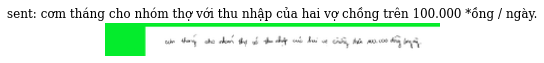

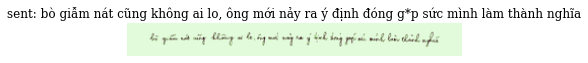

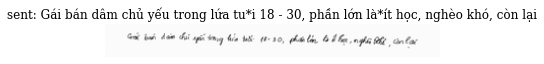

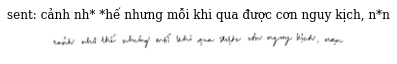

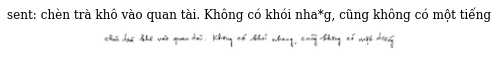

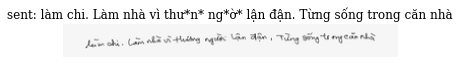

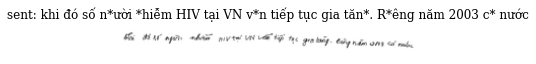

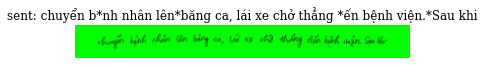

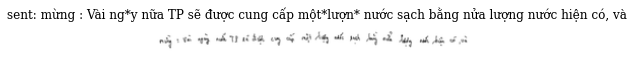

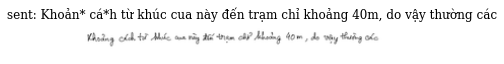

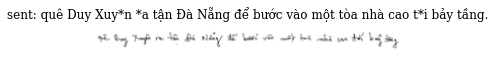

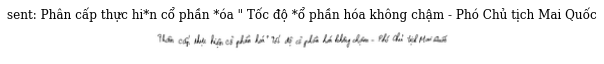

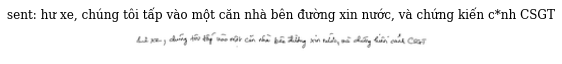

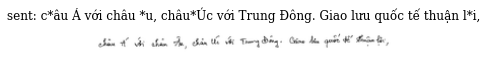

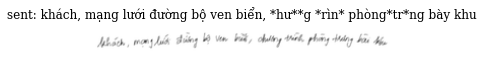

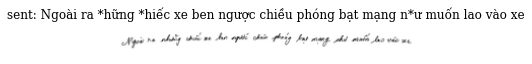

In [ ]:
trainer.visualize_dataset()

Train now

In [ ]:
trainer.train()

iter: 000200 - train loss: 1.593 - lr: 1.91e-05 - load time: 1.86 - gpu time: 86.34


KeyboardInterrupt: ignored

Visualize prediction from our trained model


In [ ]:
trainer.visualize_prediction()

Compute full seq accuracy for full valid dataset

In [ ]:
trainer.precision()